In [1]:
#Importing required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Input files for pairwise rmsd calculations.
file1 = 'D1_C.pdb'
file2 = 'D1_O.pdb'

In [3]:
def read_pdb(file):
    """
    Extracting data from pdb file as DataFrame
    
    Args:
    file (str): name of the pdb file to extract data from.
        
    Returns:
    df (DataFrame): DataFrame with data from pdb file.
    """            
    head = ['MODEL', 'ATOM NO', 'ATOM ID', 'Confmn', 'RESIDUE', 'RES SEQ','RES INSERT','X AXIS', 'Y AXIS', 'Z AXIS', 'NR']
    numb = ['MODEL', 'ATOM ID', 'Confmn', 'RESIDUE', 'RES SEQ', 'NR']
    spaces = [(0, 6), (6, 11), (12, 16), (16, 17), (17, 20), (21, 22), (22, 26), (31, 38), (38, 46), (46, 54), (54, 78)]
    df = pd.read_fwf(file, colspecs=spaces, names=head)
    df = df[df['MODEL'] == 'ATOM'].drop(columns= ['MODEL', 'NR'])
    for j in set(df.columns) - set(numb): df[j] = pd.to_numeric(df[j])
    df = df.replace(np.nan,0)
    df = df[df['Confmn'] == 0]
    df.drop(columns=['Confmn'], inplace=True)
    return df

#Importing data from the pdb files into dataframe
df1 = read_pdb(file1)
df2 = read_pdb(file2)

#selecting phosphate from back bone of the DNA
#you can select perticular atom as per the requirement of your analysis
df1 = df1[df1['ATOM ID'] == 'P']
df2 = df2[df2['ATOM ID'] == 'P']

#merging dataframes row wise based on identical atoms.
df = df1.merge(df2, how='inner', on=['ATOM ID', 'RESIDUE', 'RES SEQ', 'RES INSERT'],\
               suffixes=['_1', '_2'], validate='one_to_one')

#Dropping unnecessary columns.
df.drop(columns=['ATOM NO_1', 'ATOM NO_2'], inplace=True)
df.head()

,ATOM ID,RESIDUE,RES SEQ,RES INSERT,X AXIS_1,Y AXIS_1,Z AXIS_1,X AXIS_2,Y AXIS_2,Z AXIS_2
0,P,U,A,-3.0,-27.046,-25.494,-21.592,-24.521,-28.970,-22.113
1,P,U,A,-2.0,-24.861,-32.369,-21.864,-20.847,-33.875,-21.875
2,P,A,A,-1.0,-23.061,-36.460,-16.734,-16.423,-35.972,-17.777
3,P,U,A,0.0,-21.248,-38.389,-12.618,-12.757,-37.385,-13.736
4,P,C,A,6.0,2.951,-45.459,-9.210,-0.147,-53.165,-10.512


In [4]:
#calculating distance between corrosponding atoms between two structures
df['distance'] = np.sqrt((df['X AXIS_1'] - df['X AXIS_2'])**2 + (df['Y AXIS_1'] - df['Y AXIS_2'])**2\
                       + (df['Z AXIS_1'] - df['Z AXIS_2'])**2)
df.head()

,ATOM ID,RESIDUE,RES SEQ,RES INSERT,X AXIS_1,Y AXIS_1,Z AXIS_1,X AXIS_2,Y AXIS_2,Z AXIS_2,distance
0,P,U,A,-3.0,-27.046,-25.494,-21.592,-24.521,-28.970,-22.113,4.327776
1,P,U,A,-2.0,-24.861,-32.369,-21.864,-20.847,-33.875,-21.875,4.287231
2,P,A,A,-1.0,-23.061,-36.460,-16.734,-16.423,-35.972,-17.777,6.737139
3,P,U,A,0.0,-21.248,-38.389,-12.618,-12.757,-37.385,-13.736,8.622936
4,P,C,A,6.0,2.951,-45.459,-9.210,-0.147,-53.165,-10.512,8.406857


In [5]:
#Calculating RMSD
rmsd = np.sqrt(df['distance'].sum()/df.shape[0])
rmsd

1.7995542641108078

In [6]:
#Exorting data to csv file.
df_distances = df[['ATOM ID', 'RESIDUE', 'RES SEQ', 'RES INSERT', 'distance']]
df_distances.to_csv('result.txt', sep='\t', index=False)
df_distances.head(3)

,ATOM ID,RESIDUE,RES SEQ,RES INSERT,distance
0,P,U,A,-3.0,4.327776
1,P,U,A,-2.0,4.287231
2,P,A,A,-1.0,6.737139


<Axes: xlabel='RES INSERT', ylabel='distance'>

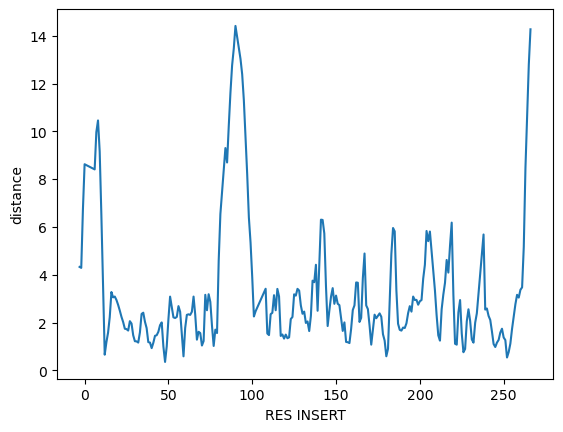

In [7]:
#visualizing rmsd per residue
sns.lineplot(x='RES INSERT', y='distance', data=df)